In [5]:
from bs4 import BeautifulSoup
import requests
from IPython.core.display import display, HTML
import pprint
import time, os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from datetime import datetime as dt


import seaborn as sns
sns.set()
import statistics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from datetime import date
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline



# Web Scraping Methods

In [2]:

url='https://www.noxinfluencer.com/youtube-channel-rank/top-1000-all-all-youtuber-sorted-by-noxscore-weekly'

response = requests.get(url)
response.status_code

In [3]:
response.status_code

200

In [4]:
response.text[:1000]

'<!DOCTYPE html><html lang="en"><head><script data-ad-client="ca-pub-3126922745219107" async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>  <title> Top 1000 Youtubers Channels Sort By NoxScore - NoxInfluencer  </title>  <meta name="keywords" content="NoxInfluencer,YouTube Influencer,Top Channel,Top NoxScore Youtubers,YouTube Stats,Most Popular YouTubers"><meta name="description" content="The 1000 most popular youtube influencer sort by NoxScore. Click to view the biggest youtube channel stats and dashboard."> <meta name="twitter:image" content="https://res06.bignox.com/noxinfluencer/youtube/avatar/influencer_launcher_app.png"><meta name="twitter:card" content="summary"><meta name="twitter:title" content=" Top 1000 Youtubers Channels Sort By NoxScore - NoxInfluencer  "><meta property="og:image:width" content="250"><meta property="og:image:height" content="250"><meta property="og:type" content="website"><meta property="fb:app_id" content="314894179081566"

In [5]:
page=response.text

In [6]:

soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup)

<!DOCTYPE html>
<html lang="en"><head><script async="" data-ad-client="ca-pub-3126922745219107" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script> <title> Top 1000 Youtubers Channels Sort By NoxScore - NoxInfluencer  </title> <meta content="NoxInfluencer,YouTube Influencer,Top Channel,Top NoxScore Youtubers,YouTube Stats,Most Popular YouTubers" name="keywords"/><meta content="The 1000 most popular youtube influencer sort by NoxScore. Click to view the biggest youtube channel stats and dashboard." name="description"/> <meta content="https://res06.bignox.com/noxinfluencer/youtube/avatar/influencer_launcher_app.png" name="twitter:image"/><meta content="summary" name="twitter:card"/><meta content=" Top 1000 Youtubers Channels Sort By NoxScore - NoxInfluencer  " name="twitter:title"/><meta content="250" property="og:image:width"/><meta content="250" property="og:image:height"/><meta content="website" property="og:type"/><meta content="314894179081566" property="f

In [8]:
soup.find('a')

<a class="logo" href="/" title="NoxInfluencer"><img alt="NoxInfluencer" src="https://res02.noxgroup.com/kol/2020/07/public/img/216253b9.png"/> </a>

In [9]:
soup.find_all('a')[-1]

<a class="__cf_email__" data-cfemail="7f0c1a0d09161c1a3f111007161119130a1a111c1a0d511c1012" href="/cdn-cgi/l/email-protection">[email protected]</a>

In [10]:
soup.find_all('a')

[<a class="logo" href="/" title="NoxInfluencer"><img alt="NoxInfluencer" src="https://res02.noxgroup.com/kol/2020/07/public/img/216253b9.png"/> </a>,
 <a class="nav-link" href="javascript:void(0);">Top List</a>,
 <a class="tab-link" data-toggle="tab" href="#header-tab-youtube-default"><i class="kolicon tab-icon kol-icon-youtube-circle" style="color: #d40c18;"></i><span class="tab-title">YouTube</span></a>,
 <a class="tab-link" data-toggle="tab" href="#header-tab-instagram-default"><i class="kol-icon tab-icon kol-icon-ins-circle"></i><span class="tab-title">Instagram</span></a>,
 <a class="tab-link" data-toggle="tab" href="#header-tab-tiktok-default"><i class="kol-icon tab-icon kol-icon-tiktok-circle"></i><span class="tab-title">TikTok</span></a>,
 <a class="tab-link" data-toggle="tab" href="#header-tab-twitch-default"><i class="kolicon tab-icon kol-icon-twitch" style="color: #6441a5"></i><span class="tab-title">Twitch</span></a>,
 <a class="sub-menu-link" href="/youtube-channel-rank/to

In [11]:
soup.find_all(class_="star-avatar")[-1].get('href')

'/youtube/channel/UCI2FmVp--YL8d7iVFt8mmxg'

In [12]:
driver = webdriver.Chrome()
driver.get(url)

In [13]:
for i in range(33):
    #Scroll
    driver.execute_script(
        "window.scrollTo(0, document.documentElement.scrollHeight);" #Alternatively, document.body.scrollHeight
    )
    
    #Wait for page to load
    time.sleep(1)

In [14]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [15]:
#checking if the scrolling has grabbed all data of interest
contents_table = soup.find('tbody', class_='lists')
len(contents_table.find_all('a', class_='star-avatar'))

1000

In [16]:
contents_table.find_all('a', class_='star-avatar')[0].get('href')

'/youtube/channel/UCq-Fj5jknLsUf-MWSy4_brA'

In [17]:
#making a list of sites for scraping
list_of_sites=[]
for x in range(0,1000):
    site=contents_table.find_all('a', class_='star-avatar')[x].get('href')
    list_of_sites.append(site)

In [102]:
#pages scraper
influencer_data_list=[]
influencer_search='https://www.noxinfluencer.com'
for pages in list_of_sites:
    influencer_query = influencer_search + pages
    page = requests.get(influencer_query).text
    parsed_page = BeautifulSoup(page, 'html5lib')
    empty=[]
    channel=parsed_page.find('span', class_='username').text
    score=parsed_page.find('span', class_='score').text
    chan_type=parsed_page.find('a', class_='tag').text
    empty.append(channel)
    empty.append(chan_type)
    empty.append(score)



    for channel_info in parsed_page.find_all('p', class_='pull-right item-value'):
        if channel_info.text.replace(" ", "").replace(u'\xa0', '')!="View":
            info=channel_info.text.replace(" ", "").replace(u'\xa0', '')
            empty.append(info)  

    for stats in parsed_page.find_all('span', class_='strong'):
        contents=stats.text.replace(" ", "")
        empty.append(contents)    
    
    earning=parsed_page.find('div', class_='est-content').text.split(' ') 
    earning=''.join(earning[1:4])
    empty.append(earning)

    cpm=parsed_page.find('span', class_='cpm').text.replace(" ", "")
    empty.append(cpm)

    influencer_data_list.append(empty)

In [103]:
#making sure I have all the data
len(influencer_data_list)

1000

In [ ]:
influencer_week_views=[]
influencer_search='https://www.noxinfluencer.com'
for pages in list_of_sites:
    influencer_query = influencer_search + pages
    page = requests.get(influencer_query).text
    parsed_page = BeautifulSoup(page, 'html5lib')
    week_view=parsed_page.find('span', class_='username').text
    

In [208]:
#Reading in data, and assigning column names
influence_df=pd.DataFrame(influencer_data_list, columns = ['Channel', 'ChannelType', \
                                                          'NoxScore', 'DateCreated',\
                                                         'Country','Language','Subscribers',\
                                                         'TotalViews', 'AverageVideoViews',\
                                                         'TotalVideos', 'EstVideoEarning',\
                                                         'EstCPMRange'])

In [209]:
#Adding rank column lazy style
influence_df['Rank']=range(1,1001)

In [191]:
#Saving original format without clean up
influence_df.to_csv("Youtube Stats.csv")

# Cleaning up scraped data

In [211]:
#Transforming values from string to float
for index, row in influence_df.iterrows():
    #language
    if "Chinese" in row['Language']:
        influence_df.iloc[index, influence_df.columns.get_loc('Language')] = 'Chinese'
    #subscribers
    if "M" in row['Subscribers']:
        x=float(row['Subscribers'][:-1])*1000000
        influence_df.iloc[index, influence_df.columns.get_loc('Subscribers')] = x
    if 'K' in row['Subscribers']:
        x=float(row['Subscribers'][:-1])*1000
        influence_df.iloc[index, influence_df.columns.get_loc('Subscribers')] = x
    if 'B' in row['Subscribers']:
        x=float(row['Subscribers'][:-1])*1000000000
        influence_df.iloc[index, influence_df.columns.get_loc('Subscribers')] = x
    #total views
    if "M" in row['TotalViews']:
        x=float(row['TotalViews'][:-1])*1000000
        influence_df.iloc[index, influence_df.columns.get_loc('TotalViews')] = x
    if 'K' in row['TotalViews']:
        x=float(row['TotalViews'][:-1])*1000
        influence_df.iloc[index, influence_df.columns.get_loc('TotalViews')] = x
    if 'B' in row['TotalViews']:
        x=float(row['TotalViews'][:-1])*1000000000
        influence_df.iloc[index, influence_df.columns.get_loc('TotalViews')] = x
    #average video views
    if "M" in row['AverageVideoViews']:
        x=float(row['AverageVideoViews'][:-1])*1000000
        influence_df.iloc[index, influence_df.columns.get_loc('AverageVideoViews')] = x
    if 'K' in row['AverageVideoViews']:
        x=float(row['AverageVideoViews'][:-1])*1000
        influence_df.iloc[index, influence_df.columns.get_loc('AverageVideoViews')] = x
    if 'B' in row['AverageVideoViews']:
        x=float(row['AverageVideoViews'][:-1])*1000000000
        influence_df.iloc[index, influence_df.columns.get_loc('AverageVideoViews')] = x
    #total videos
    if 'K' in row['TotalVideos']:
        x=float(row['TotalVideos'][:-1])*1000
        influence_df.iloc[index, influence_df.columns.get_loc('TotalVideos')] = x
    #est video earning
    influence_df.iloc[index, influence_df.columns.get_loc('EstVideoEarning')]=row['EstVideoEarning'][1:]
    if "M" in row['EstVideoEarning']:
        x=float(row['EstVideoEarning'][1:-1])*1000000
        influence_df.iloc[index, influence_df.columns.get_loc('EstVideoEarning')] = x
    if 'K' in row['EstVideoEarning']:
        x=float(row['EstVideoEarning'][1:-1])*1000
        influence_df.iloc[index, influence_df.columns.get_loc('EstVideoEarning')] = x
    

In [212]:
influence_df['DateCreated'] = pd.to_datetime(influence_df.DateCreated, 
                                            format="%Y-%m-%d")

In [ ]:
#saving a clean version locally
influence_df.to_csv("CleanYoutubeStats3.csv")

In [7]:
influence_df=pd.read_csv("CleanYoutubeStats3.csv")


In [9]:
influence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Channel            1000 non-null   object 
 2   ChannelType        1000 non-null   object 
 3   NoxScore           1000 non-null   float64
 4   DateCreated        1000 non-null   object 
 5   Country            1000 non-null   object 
 6   Language           1000 non-null   object 
 7   Subscribers        1000 non-null   int64  
 8   TotalViews         1000 non-null   int64  
 9   AverageVideoViews  1000 non-null   int64  
 10  TotalVideos        1000 non-null   int64  
 11  EstVideoEarning    1000 non-null   float64
 12  EstCPMRange        1000 non-null   object 
 13  Rank               1000 non-null   int64  
 14  BackwardsRank      1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [10]:
types_int=['Subscribers','TotalViews','AverageVideoViews', 'TotalVideos']
types_float=['NoxScore','EstVideoEarning']
for types in types_int:
    influence_df[types] = influence_df[types].astype(str).astype(float).astype(int)
for types in types_float:
    influence_df[types] = influence_df[types].astype(str).astype(float)

In [19]:
get_date=pd.read_csv("Youtube Stats.csv")
influence_df['Days']=get_date['DateCreated']

In [20]:

day_count=[]
for index, rows in influence_df.iterrows():
    year=str(rows['Days'][0:4])
    month=str(rows['Days'][5:7])
    day=str(rows['Days'][8:])
    d0 = date(int(year),int(month),int(day))
    d1 = date(2020, 7, 12)
    delta = d1 - d0
    day_count.append(delta)

In [21]:
influence_df['Days']=day_count

In [22]:
just_count=[]
for date in influence_df['Days']:
    split_date=str(date)
    split_date=split_date.split(' ')
    just_count.append(int(split_date[0]))
influence_df['Days']=just_count

In [23]:

range_mean=[]
for ranges in influence_df['EstCPMRange']:
    lst_range=ranges.replace('$','')
    lst_range=lst_range.split('-')
    lst_range=[int(lst_range[0]), int(lst_range[1])]
    range_mean.append(statistics.mean(lst_range))

influence_df['MeanEstCPMEarning']=range_mean

In [24]:
influence_df.shape

(1000, 17)

In [25]:
influence_df['BackwardsRank']=range(1000,0,-1)

# Beginning to interpret the data and continued cleaning

In [228]:
influence_df.corr()

,NoxScore,Subscribers,TotalViews,AverageVideoViews,TotalVideos,EstVideoEarning,Rank,BackwardsRank,Days,MeanEstCPMEarning
NoxScore,1.000000,0.369815,0.204500,0.190460,-0.000450,0.243499,-0.977628,0.977628,0.091835,-0.075670
Subscribers,0.369815,1.000000,0.843417,0.301512,0.070892,0.475022,-0.340211,0.340211,0.298924,0.020299
TotalViews,0.204500,0.843417,1.000000,0.183417,0.096876,0.325814,-0.177676,0.177676,0.219737,0.036598
AverageVideoViews,0.190460,0.301512,0.183417,1.000000,-0.032774,0.693700,-0.177506,0.177506,0.067402,-0.002364
TotalVideos,-0.000450,0.070892,0.096876,-0.032774,1.000000,-0.036786,-0.011724,0.011724,0.185302,-0.009981
EstVideoEarning,0.243499,0.475022,0.325814,0.693700,-0.036786,1.000000,-0.217156,0.217156,0.128947,0.251816
Rank,-0.977628,-0.340211,-0.177676,-0.177506,-0.011724,-0.217156,1.000000,-1.000000,-0.089001,0.088804
BackwardsRank,0.977628,0.340211,0.177676,0.177506,0.011724,0.217156,-1.000000,1.000000,0.089001,-0.088804
Days,0.091835,0.298924,0.219737,0.067402,0.185302,0.128947,-0.089001,0.089001,1.000000,0.063660
MeanEstCPMEarning,-0.075670,0.020299,0.036598,-0.002364,-0.009981,0.251816,0.088804,-0.088804,0.063660,1.000000


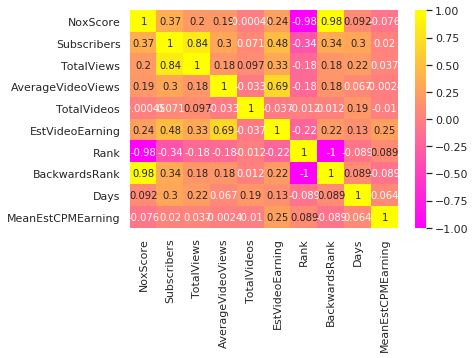

In [33]:
sns.heatmap(influence_df.corr(), cmap="spring", annot=True, vmin=-1, vmax=1);

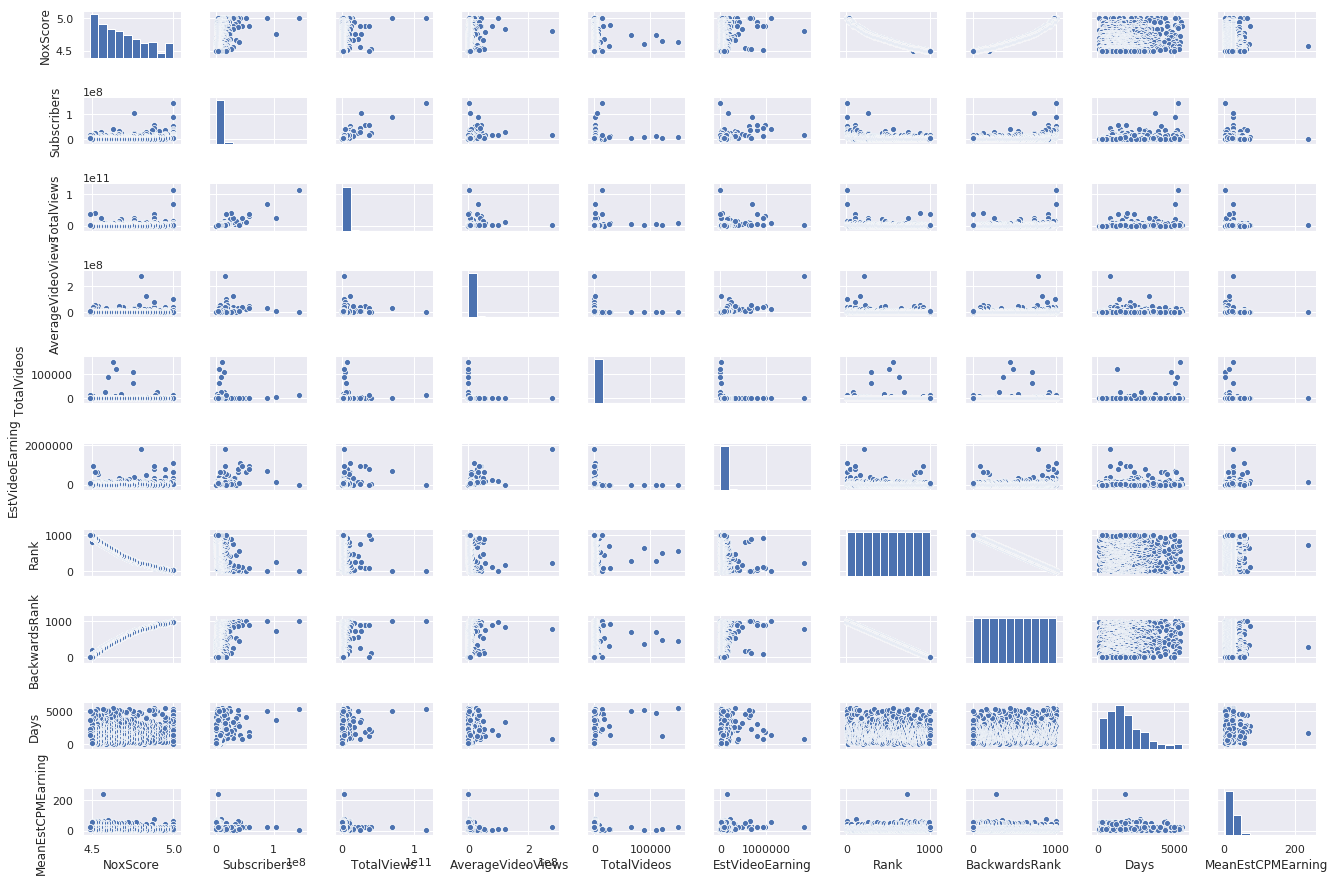

In [39]:
sns.pairplot(influence_df, height=1.2, aspect=1.5);

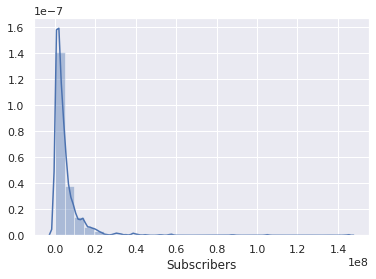

In [38]:
sns.distplot(influence_df['Subscribers'], bins=30)

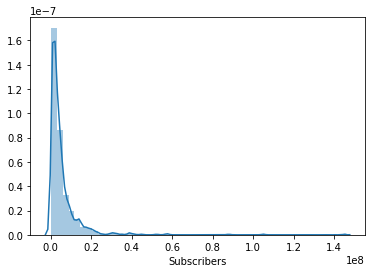

In [333]:
sns.distplot(influence_df['Subscribers'])

In [544]:
influence_df.head()

,Unnamed: 0,Channel,ChannelType,NoxScore,DateCreated,Country,Language,Subscribers,TotalViews,AverageVideoViews,TotalVideos,EstVideoEarning,EstCPMRange,Rank,BackwardsRank,Days,MeanEstCPMEarning
0,0,T-Series,Music,5.0,2006-03-13,India,English,145000000,115460000000,821010,14520,1050.0,$2-$7,1,1000,5235,4.5
1,1,Cocomelon - Nursery Rhymes,Education,5.0,2006-09-01,UnitedStates,English,87900000,69390000000,30820000,544,696430.0,$25-$29,2,999,5063,27.0
2,2,Dude Perfect,Sports,5.0,2009-03-16,UnitedStates,English,52300000,11100000000,23360000,236,621060.0,$25-$29,3,998,4136,27.0
3,3,BLACKPINK,Music,5.0,2016-06-28,SouthKorea,English,41400000,10140000000,19820000,276,1120000.0,$51-$63,4,997,1475,57.0
4,4,Big Hit Labels,Music,5.0,2008-06-04,SouthKorea,Korean,38800000,10100000000,9780000,405,645150.0,$59-$73,5,996,4421,66.0


In [545]:
y_all, X_all=patsy.dmatrices('Subscribers ~ BackwardsRank + Days + AverageVideoViews + TotalVideos + MeanEstCPMEarning + TotalViews + EstVideoEarning ', data=influence_df, return_type="dataframe")
# Create your model
model = sm.OLS(y_all, X_all)

# Fit your model to your training set
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Subscribers   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     545.2
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:03:46   Log-Likelihood:                -16618.
No. Observations:                1000   AIC:                         3.325e+04
Df Residuals:                     992   BIC:                         3.329e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.586e+05   3.63e+05     -1.262      0.207   -1.17e+06    2.54e+05
BackwardsRank      4652.9962    458.253     10.154      0.000    3753.739    5552.253
Days                797.2852    115.098      6.927      0.000     571.422    1023.148
AverageVideoViews    -0.0120      0.016     -0.775      0.438      -0.042       0.018
TotalVideos         -15.6459     16.382     -0.955      0.340     -47.793      16.501
MeanEstCPMEarning -3.247e+04   9432.635     -3.443      0.001    -5.1e+04    -1.4e+04
TotalViews            0.0012   2.57e-05     46.374      0.000       0.001       0.001
EstVideoEarning      16.5382      1.739      9.510      0.000      13.125      19.951
==============================================================================
Omnibus:                     1161.637   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           308027.694
Skew:                           5.314   Prob(JB):                         0.00
Kurtosis:                      88.321   Cond. No.                     1.62e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0, 60000000)

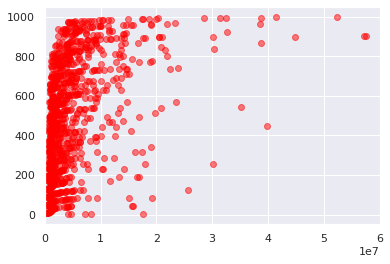

In [882]:
plt.scatter(influence_df['Subscribers'],influence_df['BackwardsRank'], alpha=.5, color='red')
plt.xlim(0, 60000000)



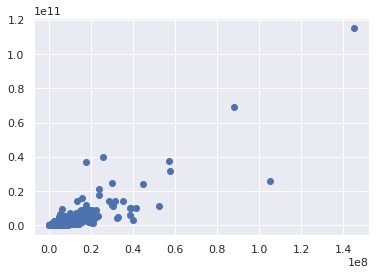

In [115]:
plt.scatter(influence_df['Subscribers'],influence_df['TotalViews'])

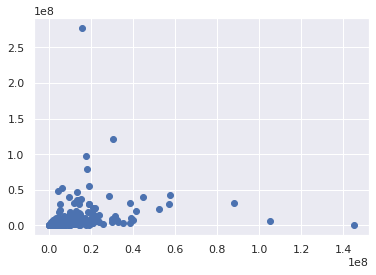

In [546]:
plt.scatter(influence_df['Subscribers'],influence_df['AverageVideoViews'])

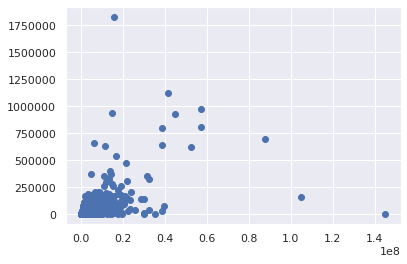

In [119]:
plt.scatter(influence_df['Subscribers'],influence_df['EstVideoEarning'])

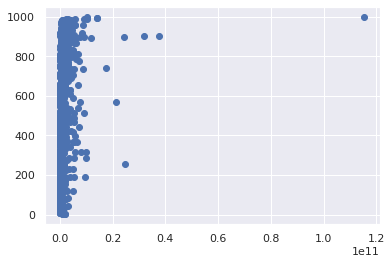

In [483]:
plt.scatter(influence_nr_df['TotalViews'],influence_nr_df['BackwardsRank'])

In [437]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 



In [200]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [201]:

def add_square_terms(df):    

    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [362]:
influence_features=influence_df[['Subscribers','Days','BackwardsRank','TotalViews', 'EstVideoEarning', 'MeanEstCPMEarning']]
m = LinearRegression()
m.fit(influence_features[['Days','BackwardsRank','TotalViews', 'EstVideoEarning', 'MeanEstCPMEarning']],influence_features['Subscribers'])
m.score(influence_features[['Days','BackwardsRank','TotalViews', 'EstVideoEarning', 'MeanEstCPMEarning']],influence_features['Subscribers'])
influence_features['res'] = abs(m.predict(influence_features[['Days','BackwardsRank','TotalViews', 'EstVideoEarning', 'MeanEstCPMEarning']])-influence_features['Subscribers'])

/home/eliza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [377]:
influence_features.nlargest(30,'res')

,Subscribers,Days,BackwardsRank,TotalViews,EstVideoEarning,MeanEstCPMEarning,res
260,105000000,3727,740,26070000000,158010.00,27.0,6.642937e+07
554,39900000,2729,446,3440000000,74410.00,10.5,3.123806e+07
995,17600000,2362,5,36760000000,248.92,14.0,2.714585e+07
875,25700000,1945,125,40130000000,41790.00,27.0,2.354751e+07
2,52300000,4136,998,11100000000,621060.00,27.0,2.277783e+07
77,32600000,3011,923,5050000000,38690.00,9.0,2.009695e+07
213,15700000,828,787,3050000000,1830000.00,27.0,1.964425e+07
131,38700000,5172,869,10060000000,28500.00,10.5,1.900254e+07
5,32500000,2765,995,4490000000,326520.00,46.5,1.715188e+07
460,13500000,3574,540,14430000000,326580.00,14.0,1.319842e+07


In [388]:
influence_df=pd.read_csv("CleanedYoutubeStats4.csv")

In [399]:
#not good practice should use range instead of actual index removal
influence_nr_df=influence_df.drop([2, 260, 554, 875,995, 77, 213, 131, 5, 460, 458,1,37,743,227,955,151,165,41,4,8,656,529,101,31,914])

In [400]:
influence_nr_df.shape

(974, 17)

In [892]:
influence_df.head()

,Unnamed: 0,Channel,ChannelType,NoxScore,DateCreated,Country,Language,Subscribers,TotalViews,AverageVideoViews,TotalVideos,EstVideoEarning,EstCPMRange,Rank,BackwardsRank,Days,MeanEstCPMEarning
0,0,T-Series,Music,5.0,2006-03-13,India,English,145000000,115460000000,821010,14520,1050.0,$2-$7,1,1000,5235,4.5
1,1,Cocomelon - Nursery Rhymes,Education,5.0,2006-09-01,UnitedStates,English,87900000,69390000000,30820000,544,696430.0,$25-$29,2,999,5063,27.0
2,2,Dude Perfect,Sports,5.0,2009-03-16,UnitedStates,English,52300000,11100000000,23360000,236,621060.0,$25-$29,3,998,4136,27.0
3,3,BLACKPINK,Music,5.0,2016-06-28,SouthKorea,English,41400000,10140000000,19820000,276,1120000.0,$51-$63,4,997,1475,57.0
4,4,Big Hit Labels,Music,5.0,2008-06-04,SouthKorea,Korean,38800000,10100000000,9780000,405,645150.0,$59-$73,5,996,4421,66.0


In [391]:
influence_df.shape

(1000, 17)

# Training Model

In [571]:
train , test = train_test_split(influence_nr_df,test_size=0.15,random_state=20)

In [598]:
X = train.loc[:,['Days','BackwardsRank','TotalViews', 'EstVideoEarning']]
X['TV/D'] = X['TotalViews']/X['Days']
X['BR2'] = X['BackwardsRank']**2
y = train['Subscribers']

X_test=test.loc[:,['Days','BackwardsRank','TotalViews', 'EstVideoEarning']]
X_test['TV/D'] = X_test['TotalViews']/X_test['Days']
X_test['BR2'] = X_test['BackwardsRank']**2
y_test=test['Subscribers']

In [623]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    
    #-----------------------------------------------------------
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    #---------------------------------------------------------

    
    #----------------------------------------------------------
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
    print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val), y_val))
    print('OLS regression score val MAE: %.3f'% mae(lm.predict(X_val), y_val))
    
    
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.5f}') 
        
    

In [624]:
split_and_validate(X, y)

OLS regression score val R^2: 0.881
OLS regression score val RMSE: 2072849.232 

OLS regression score val MAE: 1420752.386

Validation R^2 score was: 0.8806745113707669
Feature coefficient results: 

Days : 524.04371
BackwardsRank : -1477.85027
TotalViews : 0.00118
EstVideoEarning : 12.33847
TV/D : 0.14168
BR2 : 5.35930


In [580]:
#Percent of error from the mean is about 30 percent
lm = LinearRegression()
lm.fit(X_train, y_train)
(mae(lm.predict(X_val), y_val))/(train['Subscribers'].mean())

0.2970757519431546

In [542]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.3,Days
1,27.6,BackwardsRank
2,2.6,TotalViews
3,1.7,EstVideoEarning
4,3.5,TV/D
5,20.7,BR2


In [582]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [583]:
X_tr = std.transform(X_train.values)

In [584]:
X_val_ = std.transform(X_val.values)

In [585]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([591.,  49.,   9.,   5.,   2.,   1.,   1.,   1.,   0.,   2.]),
 array([-0.50244987,  0.63879873,  1.78004733,  2.92129593,  4.06254454,
         5.20379314,  6.34504174,  7.48629034,  8.62753894,  9.76878754,
        10.91003614]),
 <a list of 10 Patch objects>)

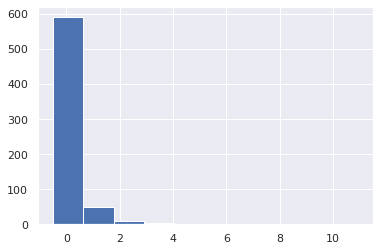

In [586]:
plt.hist(X_tr[:,3])

In [587]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [588]:
list(zip(X_train.columns, lasso_model.coef_))

[('Days', 607072.0472831192),
 ('BackwardsRank', -99795.58686887278),
 ('TotalViews', 5906525.07723414),
 ('EstVideoEarning', 1020125.3734747138),
 ('TV/D', 261440.22233089962),
 ('BR2', 1243216.7480966314)]

In [590]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

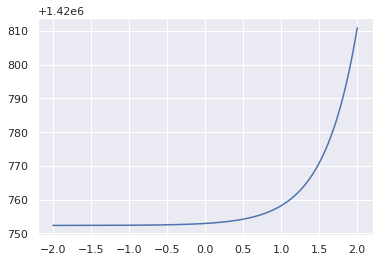

In [591]:
plt.plot(np.log10(alphalist), err_vec_val)

In [592]:
np.min(err_vec_val)

1420752.391520019

In [593]:
alphalist[np.argmin(err_vec_val)]

0.01

In [595]:

lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('Days', 0.4228534719076738),
 ('BackwardsRank', -0.0017901520112500317),
 ('TotalViews', 0.0012380010633547653),
 ('EstVideoEarning', 11.343032397007875),
 ('TV/D', 0.014200607692176277),
 ('BR2', 4.169854567915187)]

In [597]:
lr_model_lasso = Lasso(alpha = 100000)
lr_model_lasso.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_lasso.coef_))

[('Days', 523.9345434189313),
 ('BackwardsRank', -1457.9168414141416),
 ('TotalViews', 0.0011776147414735553),
 ('EstVideoEarning', 12.341053569943341),
 ('TV/D', 0.14159092128532635),
 ('BR2', 5.340125729522677)]

Text(0, 0.5, 'Residual')

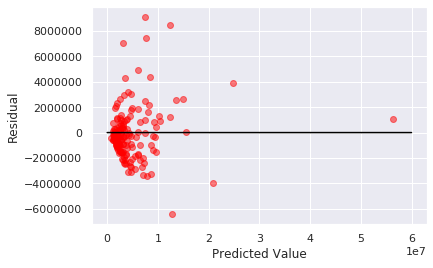

In [881]:
# perform train/val split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_val)

plt.scatter(y_pred,y_val-y_pred,alpha=.5, color='red')
plt.plot(np.linspace(0,60000000,10000),np.linspace(0,0,10000), color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [528]:

lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')

array([0.88275636, 0.75930049, 0.94632982, 0.79539027, 0.76737392])

In [529]:

gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.8563600694307053

In [530]:
RMSE(gbm.predict(X_val),y_val)

2274252.5871648593

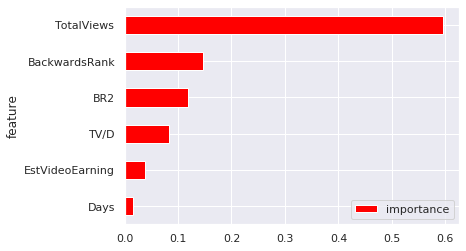

In [880]:
#SAVE THIS PLOT
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh', color='red')


# THE REAL TEST

In [889]:
def train_and_test(X, y):
    '''
    For a set of features and target X, y, perform a 85/15 train/test split, 
    fit and validate a linear regression model, and report results

    '''
    
   
    
    X = train.loc[:,['Days','BackwardsRank','TotalViews', 'EstVideoEarning']]
    X['TV/D'] = X['TotalViews']/X['Days']
    X['BR2'] = X['BackwardsRank']**2
    y = train['Subscribers']

    X_test=test.loc[:,['Days','BackwardsRank','TotalViews', 'EstVideoEarning']]
    X_test['TV/D'] = X_test['TotalViews']/X_test['Days']
    X_test['BR2'] = X_test['BackwardsRank']**2
    y_test=test['Subscribers']
    
    #-----------------------------------------------------------

    
    # fit linear regression to training data
   
    #---------------------------------------------------------

    
    #----------------------------------------------------------
    lm = LinearRegression()
    lm.fit(X, y)
    
    print('OLS regression score val R^2: %.3f' % lm.score(X_test, y_test))
    print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_test), y_test))
    print('OLS regression score val MAE: %.3f \n'% mae(lm.predict(X_test), y_test))
    
    print('Feature coefficient results:')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.5f}') 
    
    predictions=lm.predict(X_test)
    
    plt.figure(figsize=(20,10))
    plt.scatter(predictions, y_test, color='red')
    plt.xlim(0, 8000000)
    plt.ylim(0,5000000)
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    

    data= pd.DataFrame(columns=['True Values', 'Predictions'])
    data['True Values']=y_test
    data['Predictions']=predictions
    

    g=sns.lmplot(x="True Values", y="Predictions", data=data,  height=10, scatter_kws={'facecolors':'black'}, line_kws={'color': 'red'},)
    g.set(ylim=(0, 10000000), xlim=(0,10000000))
    


OLS regression score val R^2: 0.875
OLS regression score val RMSE: 2357545.661 

OLS regression score val MAE: 1492357.433 

Feature coefficient results:
Days : 601.56584
BackwardsRank : 4107.73235
TotalViews : 0.00122
EstVideoEarning : 31.79533
TV/D : -48947.33944
BR2 : -0.00001


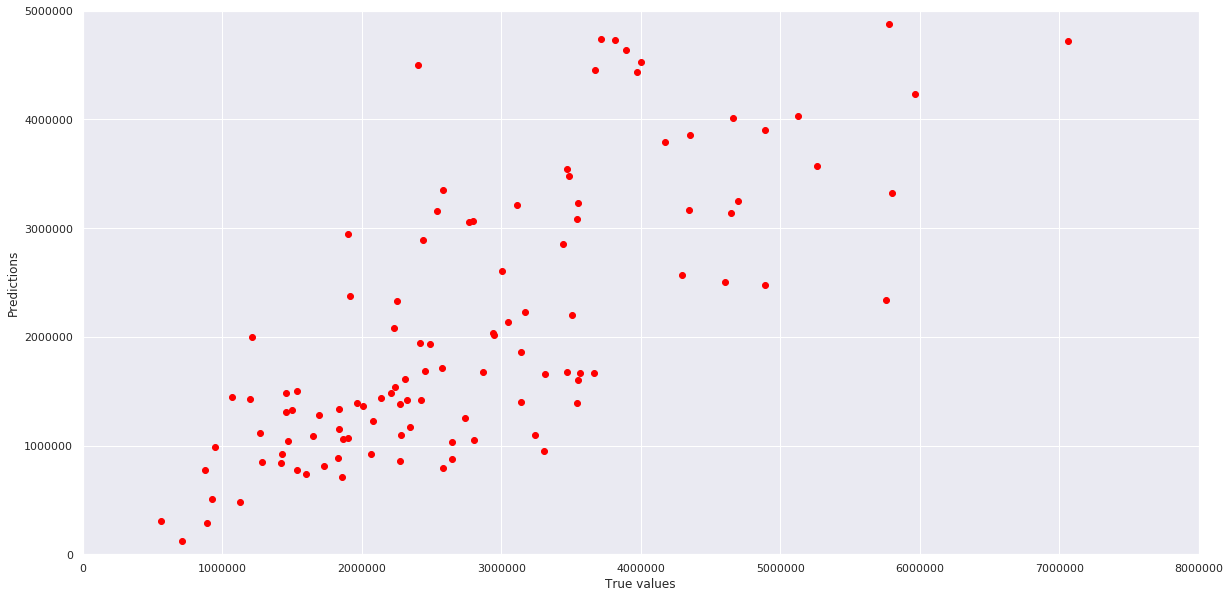

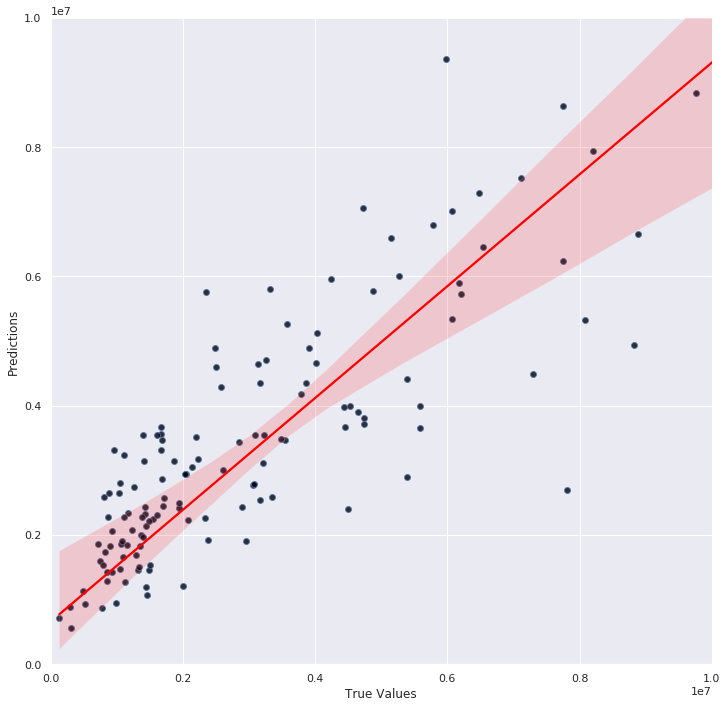

In [890]:
train_and_test(train, test)

In [187]:
influence_df.to_csv('CleanedYoutubeStats4.csv')